In [1]:
import matplotlib
import matplotlib.pyplot as plt
import matplotlib.dates as mdates

import numpy as npy
import pylab as py

from scipy.io import netcdf
import scipy.signal as si
from mpl_toolkits.basemap import Basemap

from matplotlib.colors import LogNorm
%matplotlib inline

In [15]:
import sys
sys.path.append('/home/albert/python')
print(sys.path)


['', '/home/albert/anaconda2/lib/python2.7/site-packages/oocgcm-0.1.0-py2.7.egg', '/home/albert/anaconda2/lib/python2.7/site-packages/numpy-1.11.1-py2.7-linux-x86_64.egg', '/home/albert/anaconda2/lib/python27.zip', '/home/albert/anaconda2/lib/python2.7', '/home/albert/anaconda2/lib/python2.7/plat-linux2', '/home/albert/anaconda2/lib/python2.7/lib-tk', '/home/albert/anaconda2/lib/python2.7/lib-old', '/home/albert/anaconda2/lib/python2.7/lib-dynload', '/home/albert/anaconda2/lib/python2.7/site-packages/Sphinx-1.4.1-py2.7.egg', '/home/albert/anaconda2/lib/python2.7/site-packages/setuptools-23.0.0-py2.7.egg', '/home/albert/anaconda2/lib/python2.7/site-packages', '/home/albert/anaconda2/lib/python2.7/site-packages/IPython/extensions', '/home/albert/.ipython', '/home/albert/python', '/home/albert/python', '/home/albert/python', '/home/albert/python', '/home/albert/python']


In [21]:
import PyRaf_colormaps as raf
import matplotlib as mpl


In [2]:
fdir = "/home/albert/Data/precips/ALL_NWD/"

nwdfile1 = fdir + 'NWD_GPCP_cutlat50.nc'
nwdfile2 = fdir + 'NWD_TRMM_cutlat50.nc'
nwdfile3 = fdir + 'NWD_NCEP-R1_cutlat50.nc'
nwdfile4 = fdir + 'NWD_NCEP-R2_cutlat50.nc'
nwdfile5 = fdir + 'NWD_MERRA_cutlat50_return.nc'
nwdfile6 = fdir + 'NWD_CFSR_cutlat50.nc'
nwdfile7 = fdir + 'NWD_ERAinterim_cutlat50.nc'


In [26]:
fdir = "/home/albert/Data/precips/ALL_NWD/"

nwdfilens1 = fdir + 'NWD_noseuil_GPCP.nc'
nwdfilens2 = fdir + 'NWD_noseuil_TRMM.nc'
nwdfilens3 = fdir + 'NWD_noseuil_NCEP-R1.nc'
nwdfilens4 = fdir + 'NWD_noseuil_NCEP-R2.nc'
nwdfilens5 = fdir + 'NWD_noseuil_MERRA.nc'
nwdfilens6 = fdir + 'NWD_noseuil_CFSR.nc'


In [41]:
fdir = "/home/albert/Data/precips/ALL_NWD/"

nwdifile1 = fdir + 'NWD_GPCP.nc'
nwdifile2 = fdir + 'nwd_TRMM-GPCP_interp.nc'
nwdifile3 = fdir + 'nwd_NCEP-R1-GPCP_interp.nc'
nwdifile4 = fdir + 'nwd_NCEP-R2-GPCP_interp.nc'
nwdifile5 = fdir + 'nwd_MERRA-GPCP_interp.nc'
nwdifile6 = fdir + 'nwd_CFSR-GPCP_interp.nc'
nwdifile7 = fdir + 'nwd_ERAinterim-GPCP_interp.nc'


In [3]:
maskfile4 = "/home/albert/Data/precips/NCEP-R2/mask_NCEP-R2_corr.nc"

In [3]:
fnwd1 = netcdf.netcdf_file(nwdfile1,'r')
fnwd2 = netcdf.netcdf_file(nwdfile2,'r')
fnwd3 = netcdf.netcdf_file(nwdfile3,'r')
fnwd4 = netcdf.netcdf_file(nwdfile4,'r')
fnwd5 = netcdf.netcdf_file(nwdfile5,'r')
fnwd6 = netcdf.netcdf_file(nwdfile6,'r')
fnwd7 = netcdf.netcdf_file(nwdfile7,'r')


In [27]:
fnwdns1 = netcdf.netcdf_file(nwdfilens1,'r')
fnwdns2 = netcdf.netcdf_file(nwdfilens2,'r')
fnwdns3 = netcdf.netcdf_file(nwdfilens3,'r')
fnwdns4 = netcdf.netcdf_file(nwdfilens4,'r')
fnwdns5 = netcdf.netcdf_file(nwdfilens5,'r')
fnwdns6 = netcdf.netcdf_file(nwdfilens6,'r')


In [42]:
fnwdi1 = netcdf.netcdf_file(nwdifile1,'r')
fnwdi2 = netcdf.netcdf_file(nwdifile2,'r')
fnwdi3 = netcdf.netcdf_file(nwdifile3,'r')
fnwdi4 = netcdf.netcdf_file(nwdifile4,'r')
fnwdi5 = netcdf.netcdf_file(nwdifile5,'r')
fnwdi6 = netcdf.netcdf_file(nwdifile6,'r')
fnwdi7 = netcdf.netcdf_file(nwdifile7,'r')


In [7]:
mask4 = netcdf.netcdf_file(maskfile4,'r')

In [4]:
nwd1 = fnwd1.variables['precip']
nwd2 = fnwd2.variables['precip']
nwd3 = fnwd3.variables['precip']
nwd4 = fnwd4.variables['precip']
nwd5 = fnwd5.variables['precip']
nwd6 = fnwd6.variables['precip']
nwd7 = fnwd7.variables['precip']

lat1 = fnwd1.variables['lat']
lon1 = fnwd1.variables['lon']
lat2 = fnwd2.variables['lat']
lon2 = fnwd2.variables['lon']
lat3 = fnwd3.variables['lat']
lon3 = fnwd3.variables['lon']
lat4 = fnwd4.variables['lat']
lon4 = fnwd4.variables['lon']
lat5 = fnwd5.variables['lat']
lon5 = fnwd5.variables['lon']
lat6 = fnwd6.variables['lat']
lon6 = fnwd6.variables['lon']
lat7 = fnwd7.variables['lat']
lon7 = fnwd7.variables['lon']



In [28]:
nwdns1 = fnwdns1.variables['precip']
nwdns2 = fnwdns2.variables['precip']
nwdns3 = fnwdns3.variables['precip']
nwdns4 = fnwdns4.variables['precip']
nwdns5 = fnwdns5.variables['precip']
nwdns6 = fnwdns6.variables['precip']

lat1 = fnwdns1.variables['lat']
lon1 = fnwdns1.variables['lon']
lat2 = fnwdns2.variables['lat']
lon2 = fnwdns2.variables['lon']
lat3 = fnwdns3.variables['lat']
lon3 = fnwdns3.variables['lon']
lat4 = fnwdns4.variables['lat']
lon4 = fnwdns4.variables['lon']
lat5 = fnwdns5.variables['lat']
lon5 = fnwdns5.variables['lon']
lat6 = fnwdns6.variables['lat']
lon6 = fnwdns6.variables['lon']



In [44]:
nwdi1 = fnwdi1.variables['precip']
nwdi2 = fnwdi2.variables['nwd']
nwdi3 = fnwdi3.variables['nwd']
nwdi4 = fnwdi4.variables['nwd']
nwdi5 = fnwdi5.variables['nwd']
nwdi6 = fnwdi6.variables['nwd']
nwdi7 = fnwdi7.variables['nwd']

lat1 = fnwdi1.variables['lat']
lon1 = fnwdi1.variables['lon']
lat2 = fnwdi2.variables['lat']
lon2 = fnwdi2.variables['lon']
lat3 = fnwdi3.variables['lat']
lon3 = fnwdi3.variables['lon']
lat4 = fnwdi4.variables['lat']
lon4 = fnwdi4.variables['lon']
lat5 = fnwdi5.variables['lat']
lon5 = fnwdi5.variables['lon']
lat6 = fnwdi6.variables['lat']
lon6 = fnwdi6.variables['lon']
lat7 = fnwdi7.variables['lat']
lon7 = fnwdi7.variables['lon']



In [15]:
msk4 = mask4.variables['lsm']

In [5]:
lat1a=lat1[:]
lon1a=lon1[:]
lat2a=lat2[:]
lon2a=lon2[:]
lat3a=lat3[:]
lon3a=lon3[:]
lat4a=lat4[:]
lon4a=lon4[:]
lat5a=lat5[:]
lon5a=lon5[:]
lat6a=lat6[:]
lon6a=lon6[:]
lat7a=lat7[:]
lon7a=lon7[:]

nwd1a=nwd1[:]
nwd2a=nwd2[:]
nwd3a=nwd3[:]
nwd4a=nwd4[:]
nwd5a=nwd5[:]
nwd6a=nwd6[:]
nwd7a=nwd7[:]



In [29]:
lat1a=lat1[:]
lon1a=lon1[:]
lat2a=lat2[:]
lon2a=lon2[:]
lat3a=lat3[:]
lon3a=lon3[:]
lat4a=lat4[:]
lon4a=lon4[:]
lat5a=lat5[:]
lon5a=lon5[:]
lat6a=lat6[:]
lon6a=lon6[:]

nwdns1a=nwdns1[:]
nwdns2a=nwdns2[:]
nwdns3a=nwdns3[:]
nwdns4a=nwdns4[:]
nwdns5a=nwdns5[:]
nwdns6a=nwdns6[:]



In [45]:
lat1a=lat1[:]
lon1a=lon1[:]
lat2a=lat2[:]
lon2a=lon2[:]
lat3a=lat3[:]
lon3a=lon3[:]
lat4a=lat4[:]
lon4a=lon4[:]
lat5a=lat5[:]
lon5a=lon5[:]
lat6a=lat6[:]
lon6a=lon6[:]
lat7a=lat7[:]
lon7a=lon7[:]

nwdi1a=nwdi1[:]
nwdi2a=nwdi2[:]
nwdi3a=nwdi3[:]
nwdi4a=nwdi4[:]
nwdi5a=nwdi5[:]
nwdi6a=nwdi6[:]
nwdi7a=nwdi7[:]



In [18]:
lon2D1, lat2D1 = npy.meshgrid(lon1a, lat1a)
lon2D2, lat2D2 = npy.meshgrid(lon2a, lat2a)
lon2D3, lat2D3 = npy.meshgrid(lon3a, lat3a)
lon2D4, lat2D4 = npy.meshgrid(lon4a, lat4a)
lon2D5, lat2D5 = npy.meshgrid(lon5a, lat5a)
lon2D6, lat2D6 = npy.meshgrid(lon6a, lat6a)
lon2D7, lat2D7 = npy.meshgrid(lon7a, lat7a)


In [16]:
msk4a=msk4[:]

In [12]:
npy.where(lon5a==0.)
lon5a[270]

180.0

In [6]:
mask1=npy.equal(nwd1a,0.)
nwd1a_ma=npy.ma.array(nwd1a,mask=mask1)
mask2=npy.equal(nwd2a,0.)
nwd2a_ma=npy.ma.array(nwd2a,mask=mask2)
mask3=npy.equal(nwd3a,0.)
nwd3a_ma=npy.ma.array(nwd3a,mask=mask3)
mask4=npy.equal(nwd4a,0.)
nwd4a_ma=npy.ma.array(nwd4a,mask=mask4)
mask5=npy.equal(nwd5a,0.)
nwd5a_ma=npy.ma.array(nwd5a,mask=mask5)
mask6=npy.equal(nwd6a,0.)
nwd6a_ma=npy.ma.array(nwd6a,mask=mask6)
mask7=npy.equal(nwd7a,0.)
nwd7a_ma=npy.ma.array(nwd7a,mask=mask7)



In [7]:
def plot(lat,lon,nwd,title):
 plt.pcolor(lon, lat,nwd[0],vmin=0,vmax=100)
 plt.axis([0, 360, -90, 90])
 plt.colorbar(orientation='horizontal')
 plt.title(title)

def plotm(lat,lon,nwd,msk,title):
 plt.pcolor(lon, lat,nwd[0]*msk[0],vmin=0,vmax=100)
 plt.axis([0, 360, -90, 90])
 plt.colorbar(orientation='horizontal')
 plt.title(title)
    
def plotnh(lat,lon,nwd,title):
 plt.pcolor(lon, lat,nwd[0],vmin=0,vmax=100)
 plt.axis([0, 360, -50, 50])
 plt.colorbar(orientation='horizontal')
 plt.title(title)
    
def plotnhbwr(lat,lon,nwd,title):
 plt.pcolor(lon, lat,nwd[0],vmin=-80,vmax=80,cmap='bwr')
 plt.axis([0, 360, -50, 50])
 plt.colorbar(orientation='horizontal')
 plt.title(title)

def plotmnh(lat,lon,nwd,msk,title):
 plt.pcolor(lon, lat,nwd[0]*msk[0],vmin=0,vmax=100)
 plt.axis([0, 360, -50, 50])
 plt.colorbar(orientation='horizontal')
 plt.title(title)
    
def map2d(lat,lon,nwd,title,vmin,vmax,cmap):
    map= Basemap(boundinglat=-60,resolution='l',area_thresh=1000.,\
          llcrnrlon=lon.min() ,llcrnrlat=lat.min(),\
          urcrnrlon=lon.max() , urcrnrlat=lat.max(),\
          suppress_ticks=False,\
          lat_0=lat.mean(),lon_0=lon.mean())
    map.drawcoastlines()
    map.fillcontinents(color='lightgrey')
    #map.drawmeridians(py.arange(-180,180,50))
    #map.drawparallels(py.arange(-90,90,50))
    CS=map.pcolormesh(lon,lat,nwd,vmin=vmin,vmax=vmax,cmap=cmap)
    CS.set_linewidth(0)
    plt.colorbar(orientation='horizontal')
    plt.title(title)
    plt.xlabel('Lon')
    plt.ylabel('Lat')

def map2d_enlarge(lat,lon,nwd,title,vmin,vmax,cmap):
    map= Basemap(boundinglat=-60,resolution='l',area_thresh=1000.,\
          llcrnrlon=lon.min() ,llcrnrlat=-89.5,\
          urcrnrlon=lon.max() , urcrnrlat=89.5,\
          suppress_ticks=False,\
          lat_0=lat.mean(),lon_0=lon.mean())
    map.drawcoastlines()
    map.fillcontinents(color='lightgrey')
    #map.drawmeridians(py.arange(-180,180,50))
    #map.drawparallels(py.arange(-90,90,50))
    CS=map.pcolormesh(lon,lat,nwd,vmin=vmin,vmax=vmax,cmap=cmap)
    CS.set_linewidth(0)
    plt.colorbar(orientation='horizontal')
    plt.title(title)
    plt.xlabel('Lon')
    plt.ylabel('Lat')


In [28]:
lat2a.mean()

0.0

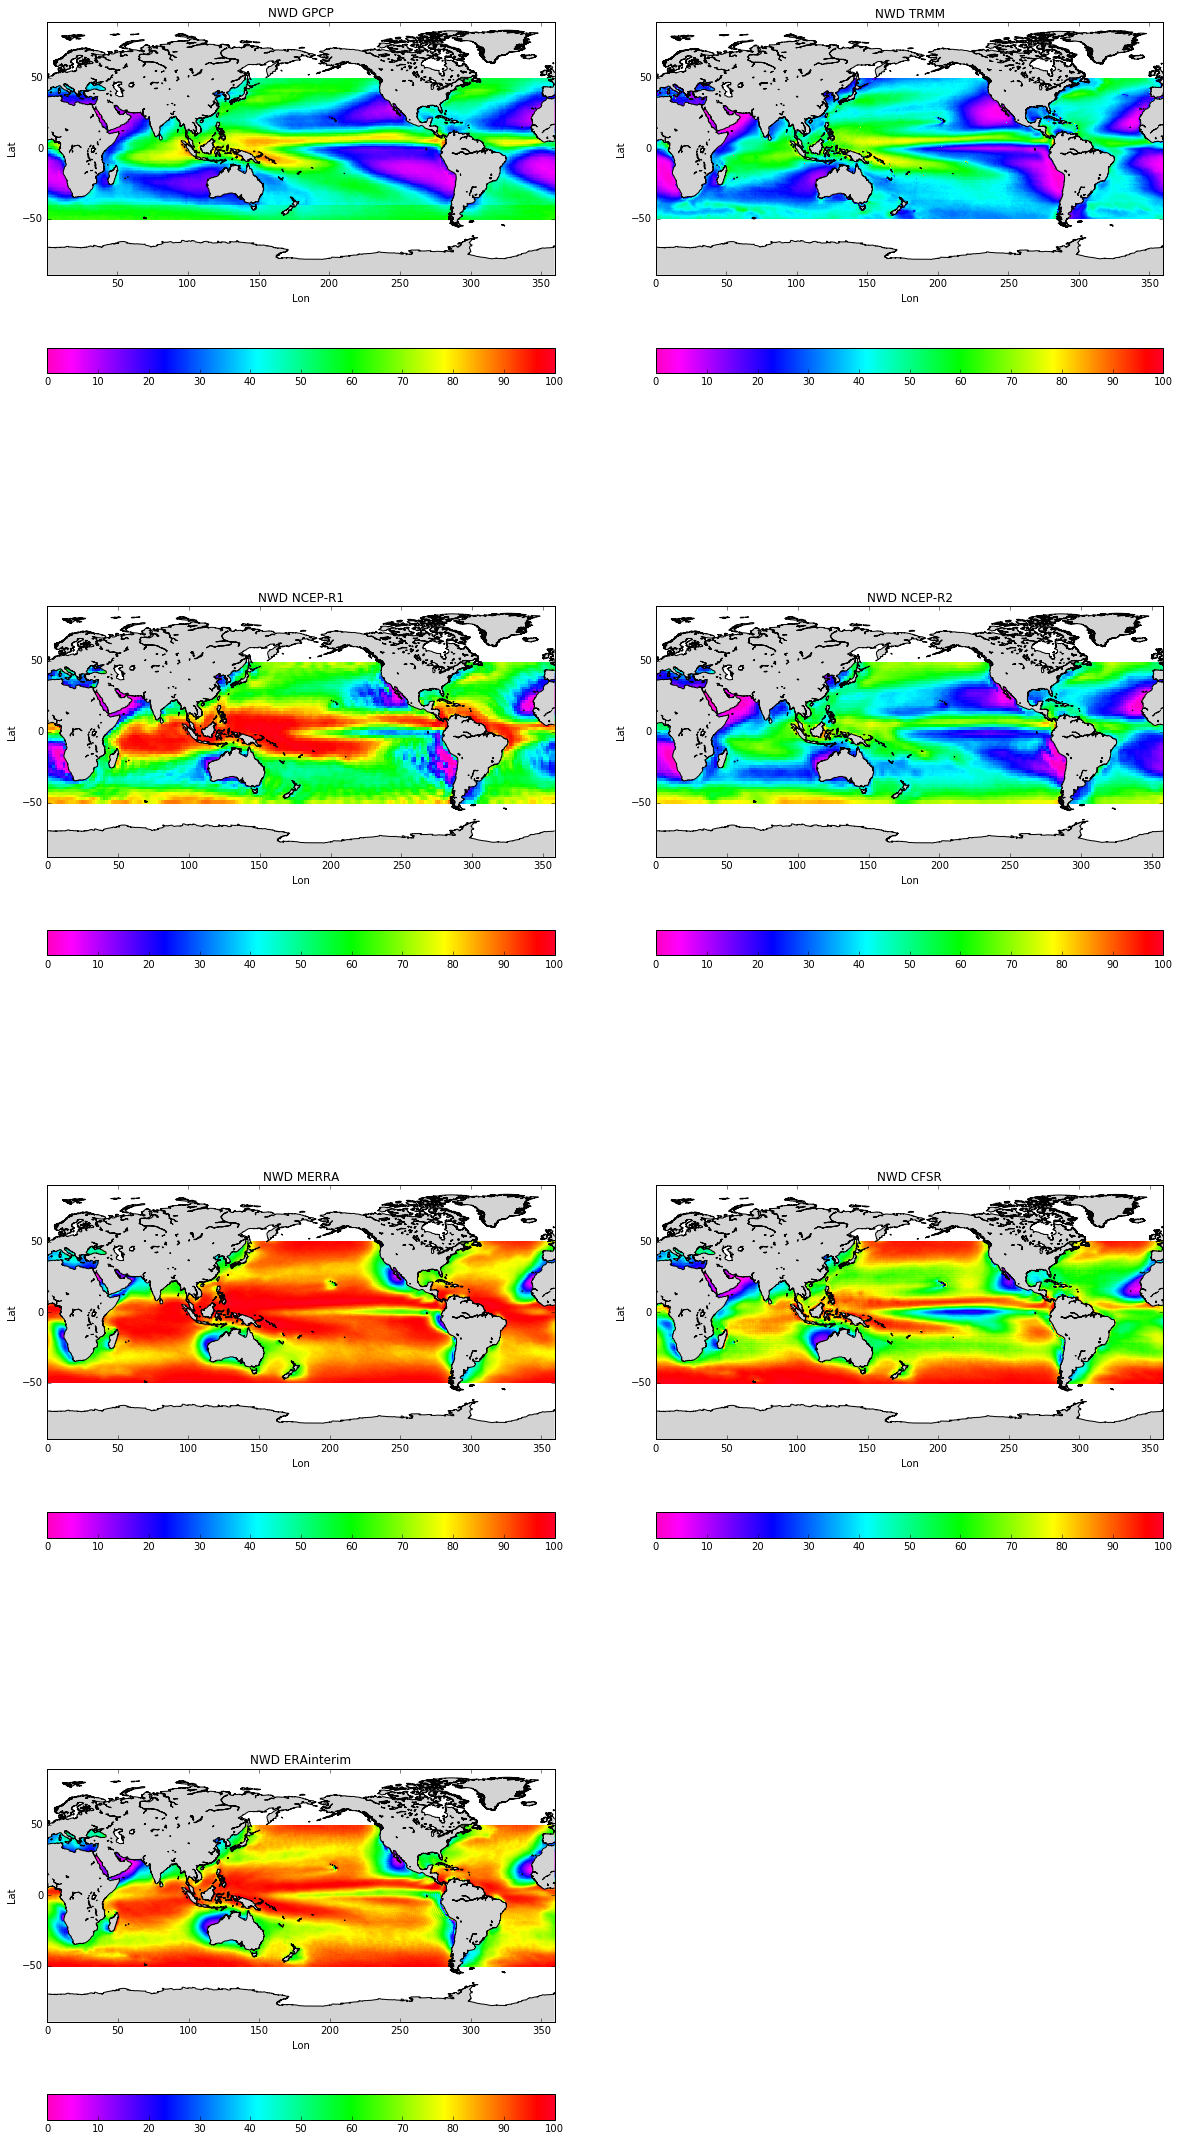

In [8]:
plt.figure(figsize=(20,40))
plt.subplot(4,2,1)
map2d(lat1a,lon1a,nwd1a_ma[0],'NWD GPCP',0,100,'gist_rainbow_r')
plt.subplot(4,2,2)
map2d_enlarge(lat2a,lon2a,nwd2a_ma[0],'NWD TRMM',0,100,'gist_rainbow_r')
plt.subplot(4,2,3)            
map2d(lat3a,lon3a,nwd3a_ma[0],'NWD NCEP-R1',0,100,'gist_rainbow_r')
plt.subplot(4,2,4)            
map2d(lat4a,lon4a,nwd4a_ma[0],'NWD NCEP-R2',0,100,'gist_rainbow_r')
plt.subplot(4,2,5)            
map2d(lat5a,lon5a,nwd5a_ma[0],'NWD MERRA',0,100,'gist_rainbow_r')
plt.subplot(4,2,6)            
map2d(lat6a,lon6a,nwd6a_ma[0],'NWD CFSR',0,100,'gist_rainbow_r')
plt.subplot(4,2,7)            
map2d(lat7a,lon7a,nwd7a_ma[0],'NWD ERAinterim',0,100,'gist_rainbow_r')
plt.savefig('/home/albert/Data/precips/PLOTS/cartes_NWD.png')

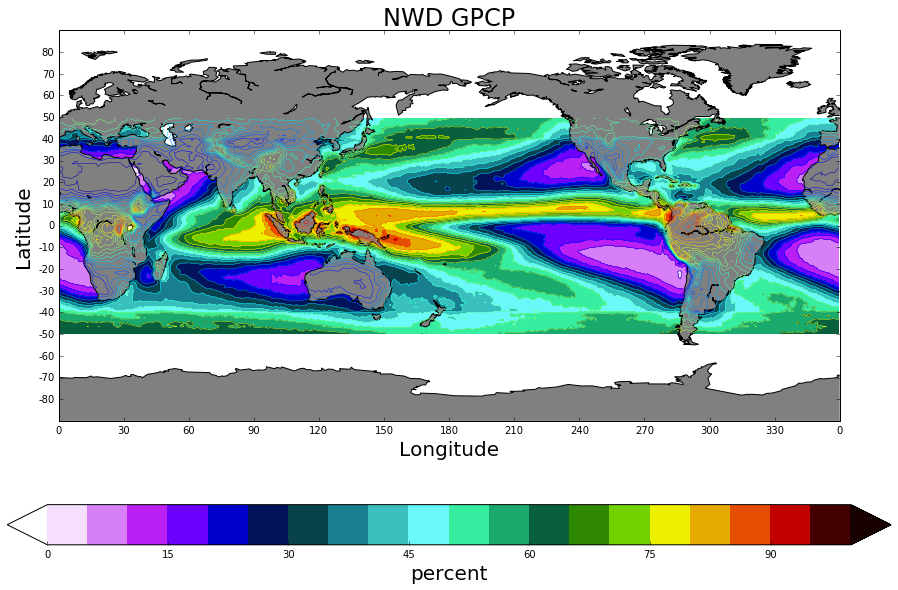

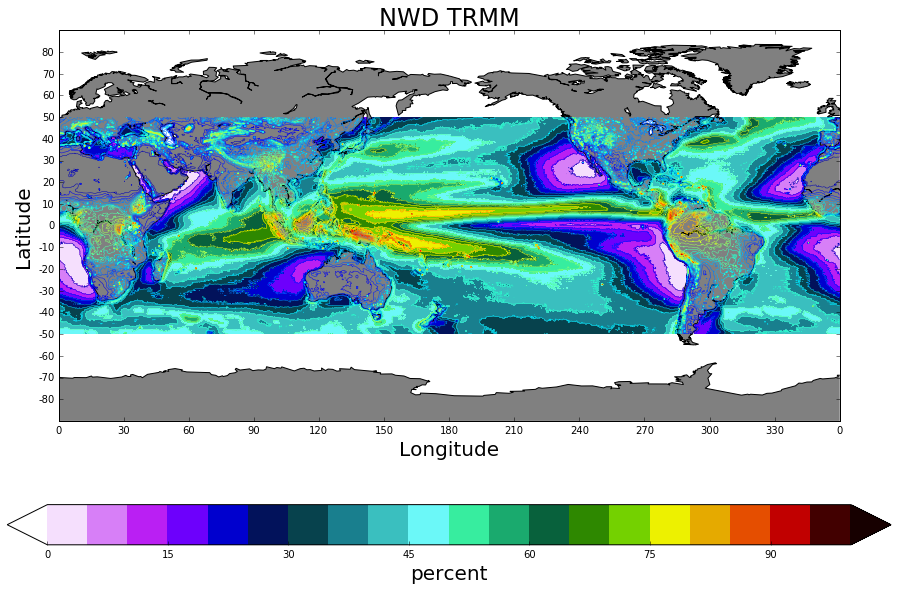

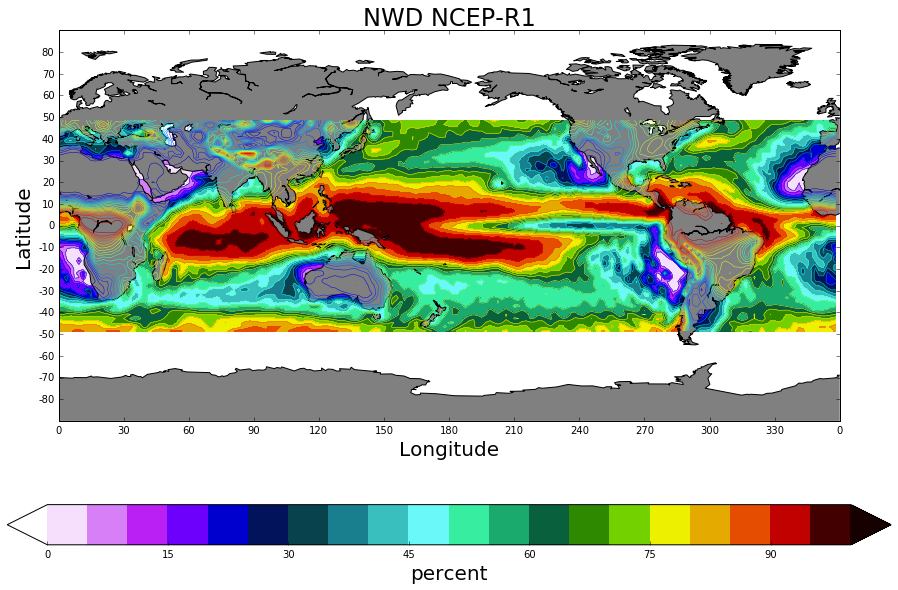

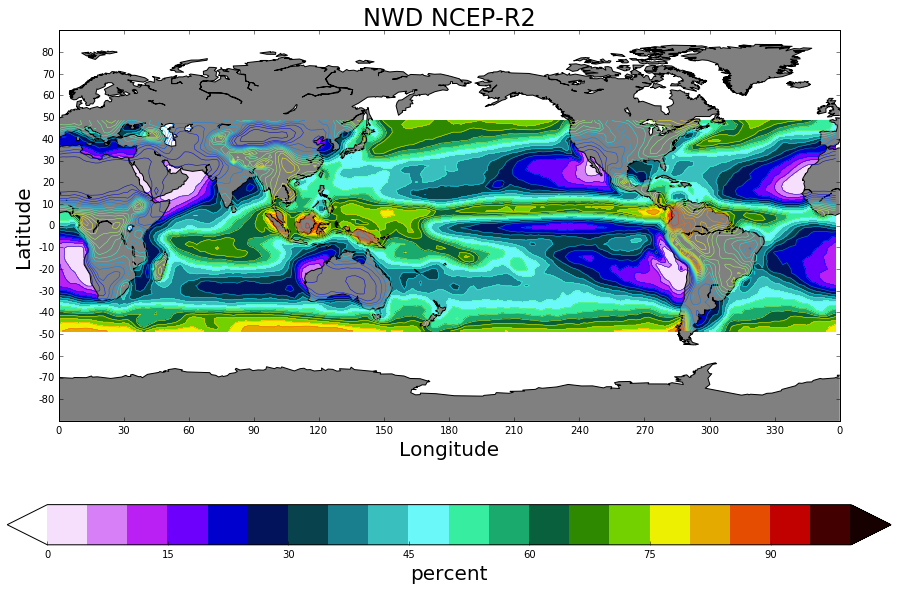

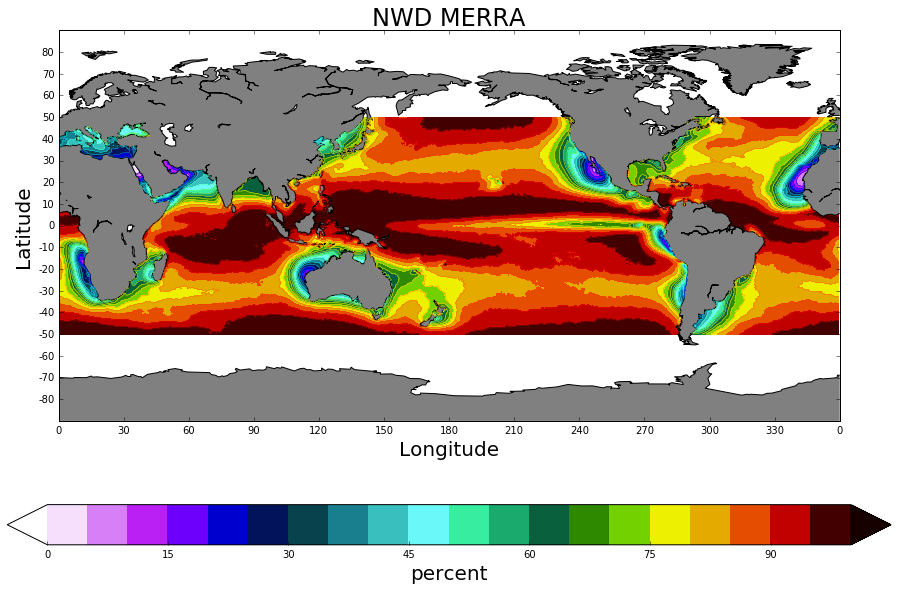

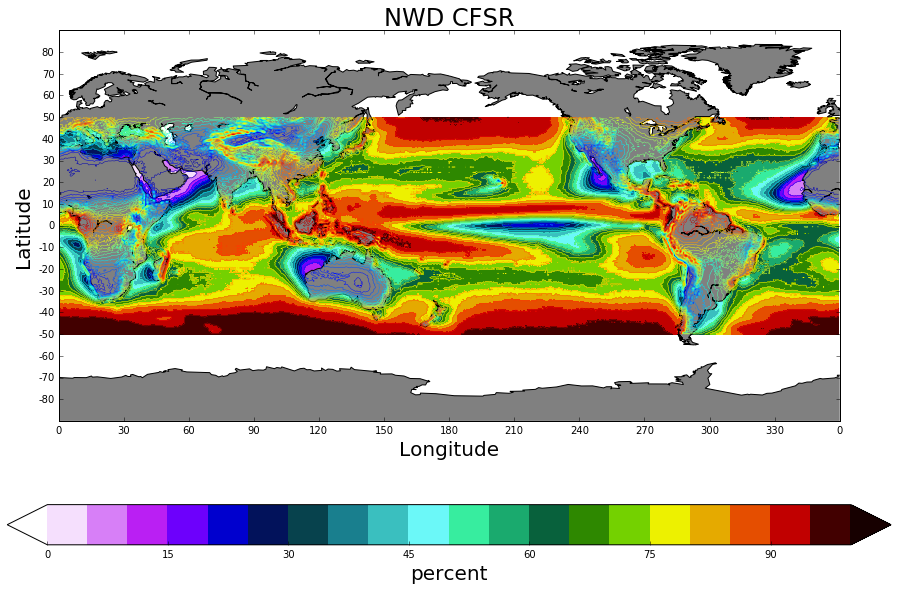

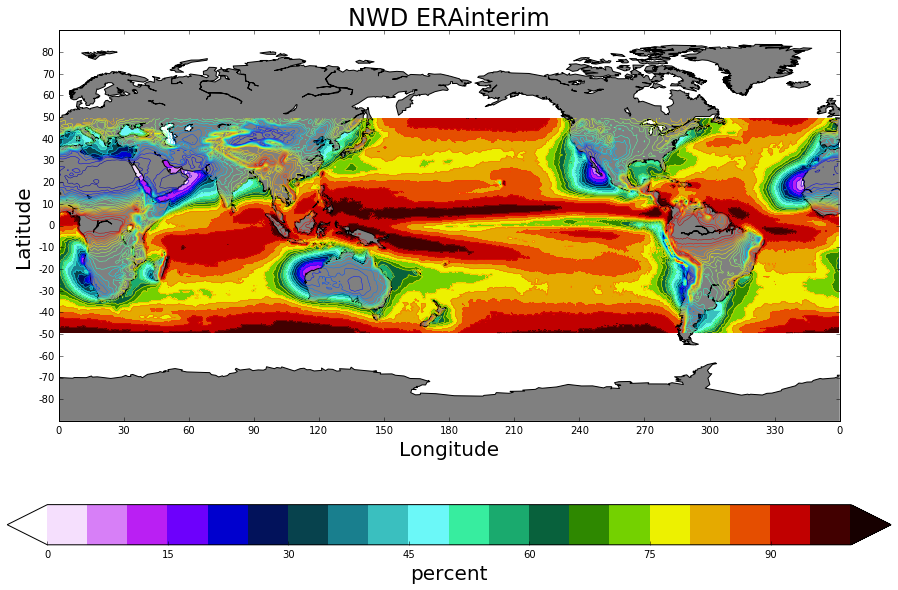

In [23]:
def map_anna(lat,lon,nwd,title,filename):
    plt.figure(figsize=[16. , 10.])
    m= Basemap(projection='cyl',llcrnrlat=-90,urcrnrlat=90,\
    llcrnrlon=0,urcrnrlon=360,resolution='c')
    m.contourf(lon,lat,nwd)
    m.drawcoastlines()
    limits=[0,100]
    norm = mpl.colors.Normalize(vmin=limits[0], vmax=limits[1])
    pal = raf.gen_pal_Testu()
    contours = npy.arange(0,105,5)
    C = m.contour(lon,lat,nwd,contours,linewidths=0.5,color='black')
    C = m.contourf(lon,lat,nwd,contours,cmap=pal,norm=norm,extend='both')
    m.fillcontinents(color='grey',lake_color='white')
    # colorbar      
    cbar = plt.colorbar(C,orientation='horizontal',shrink=0.99)
    plt.clim(limits[0],limits[1])
    cbar.set_label(r'percent',fontsize=20)
    # x axis
    locs, labels = plt.xticks()
    newlocs   = npy.array([0,30,60,90,120,150,180,210,240,270,300,330,360],'f')
    newlabels = npy.array([0,30,60,90,120,150,180,210,240,270,300,330,0],'i')
    plt.xticks(newlocs,newlabels)
    plt.xlabel('Longitude',fontsize=20)
    # y axis
    locsY,labelsy = plt.yticks()
    newlocsy   = npy.array([-80,-70,-60,-50,-40,-30,-20,-10,0,10,20,30,40,50,60,70,80],'f')
    newlabelsy = npy.array([-80,-70,-60,-50,-40,-30,-20,-10,0,10,20,30,40,50,60,70,80],'i')
    plt.yticks(newlocsy,newlabelsy)
    plt.ylabel('Latitude',fontsize=20) 
    # title
    plt.title(title,fontsize=24)
    plt.savefig(filename)



map_anna(lat2D1,lon2D1,nwd1a_ma[0],'NWD GPCP','/home/albert/Data/precips/PLOTS/cartes_NWD_GPCP.png')
map_anna(lat2D2,lon2D2,nwd2a_ma[0],'NWD TRMM','/home/albert/Data/precips/PLOTS/cartes_NWD_TRMM.png')
map_anna(lat2D3,lon2D3,nwd3a_ma[0],'NWD NCEP-R1','/home/albert/Data/precips/PLOTS/cartes_NWD_NCEP-R1.png')
map_anna(lat2D4,lon2D4,nwd4a_ma[0],'NWD NCEP-R2','/home/albert/Data/precips/PLOTS/cartes_NWD_NCEP-R2.png')
map_anna(lat2D5,lon2D5,nwd5a_ma[0],'NWD MERRA','/home/albert/Data/precips/PLOTS/cartes_NWD_MERRA.png')
map_anna(lat2D6,lon2D6,nwd6a_ma[0],'NWD CFSR','/home/albert/Data/precips/PLOTS/cartes_NWD_CFSR.png')
map_anna(lat2D7,lon2D7,nwd7a_ma[0],'NWD ERAinterim','/home/albert/Data/precips/PLOTS/cartes_NWD_ERAinterim.png')


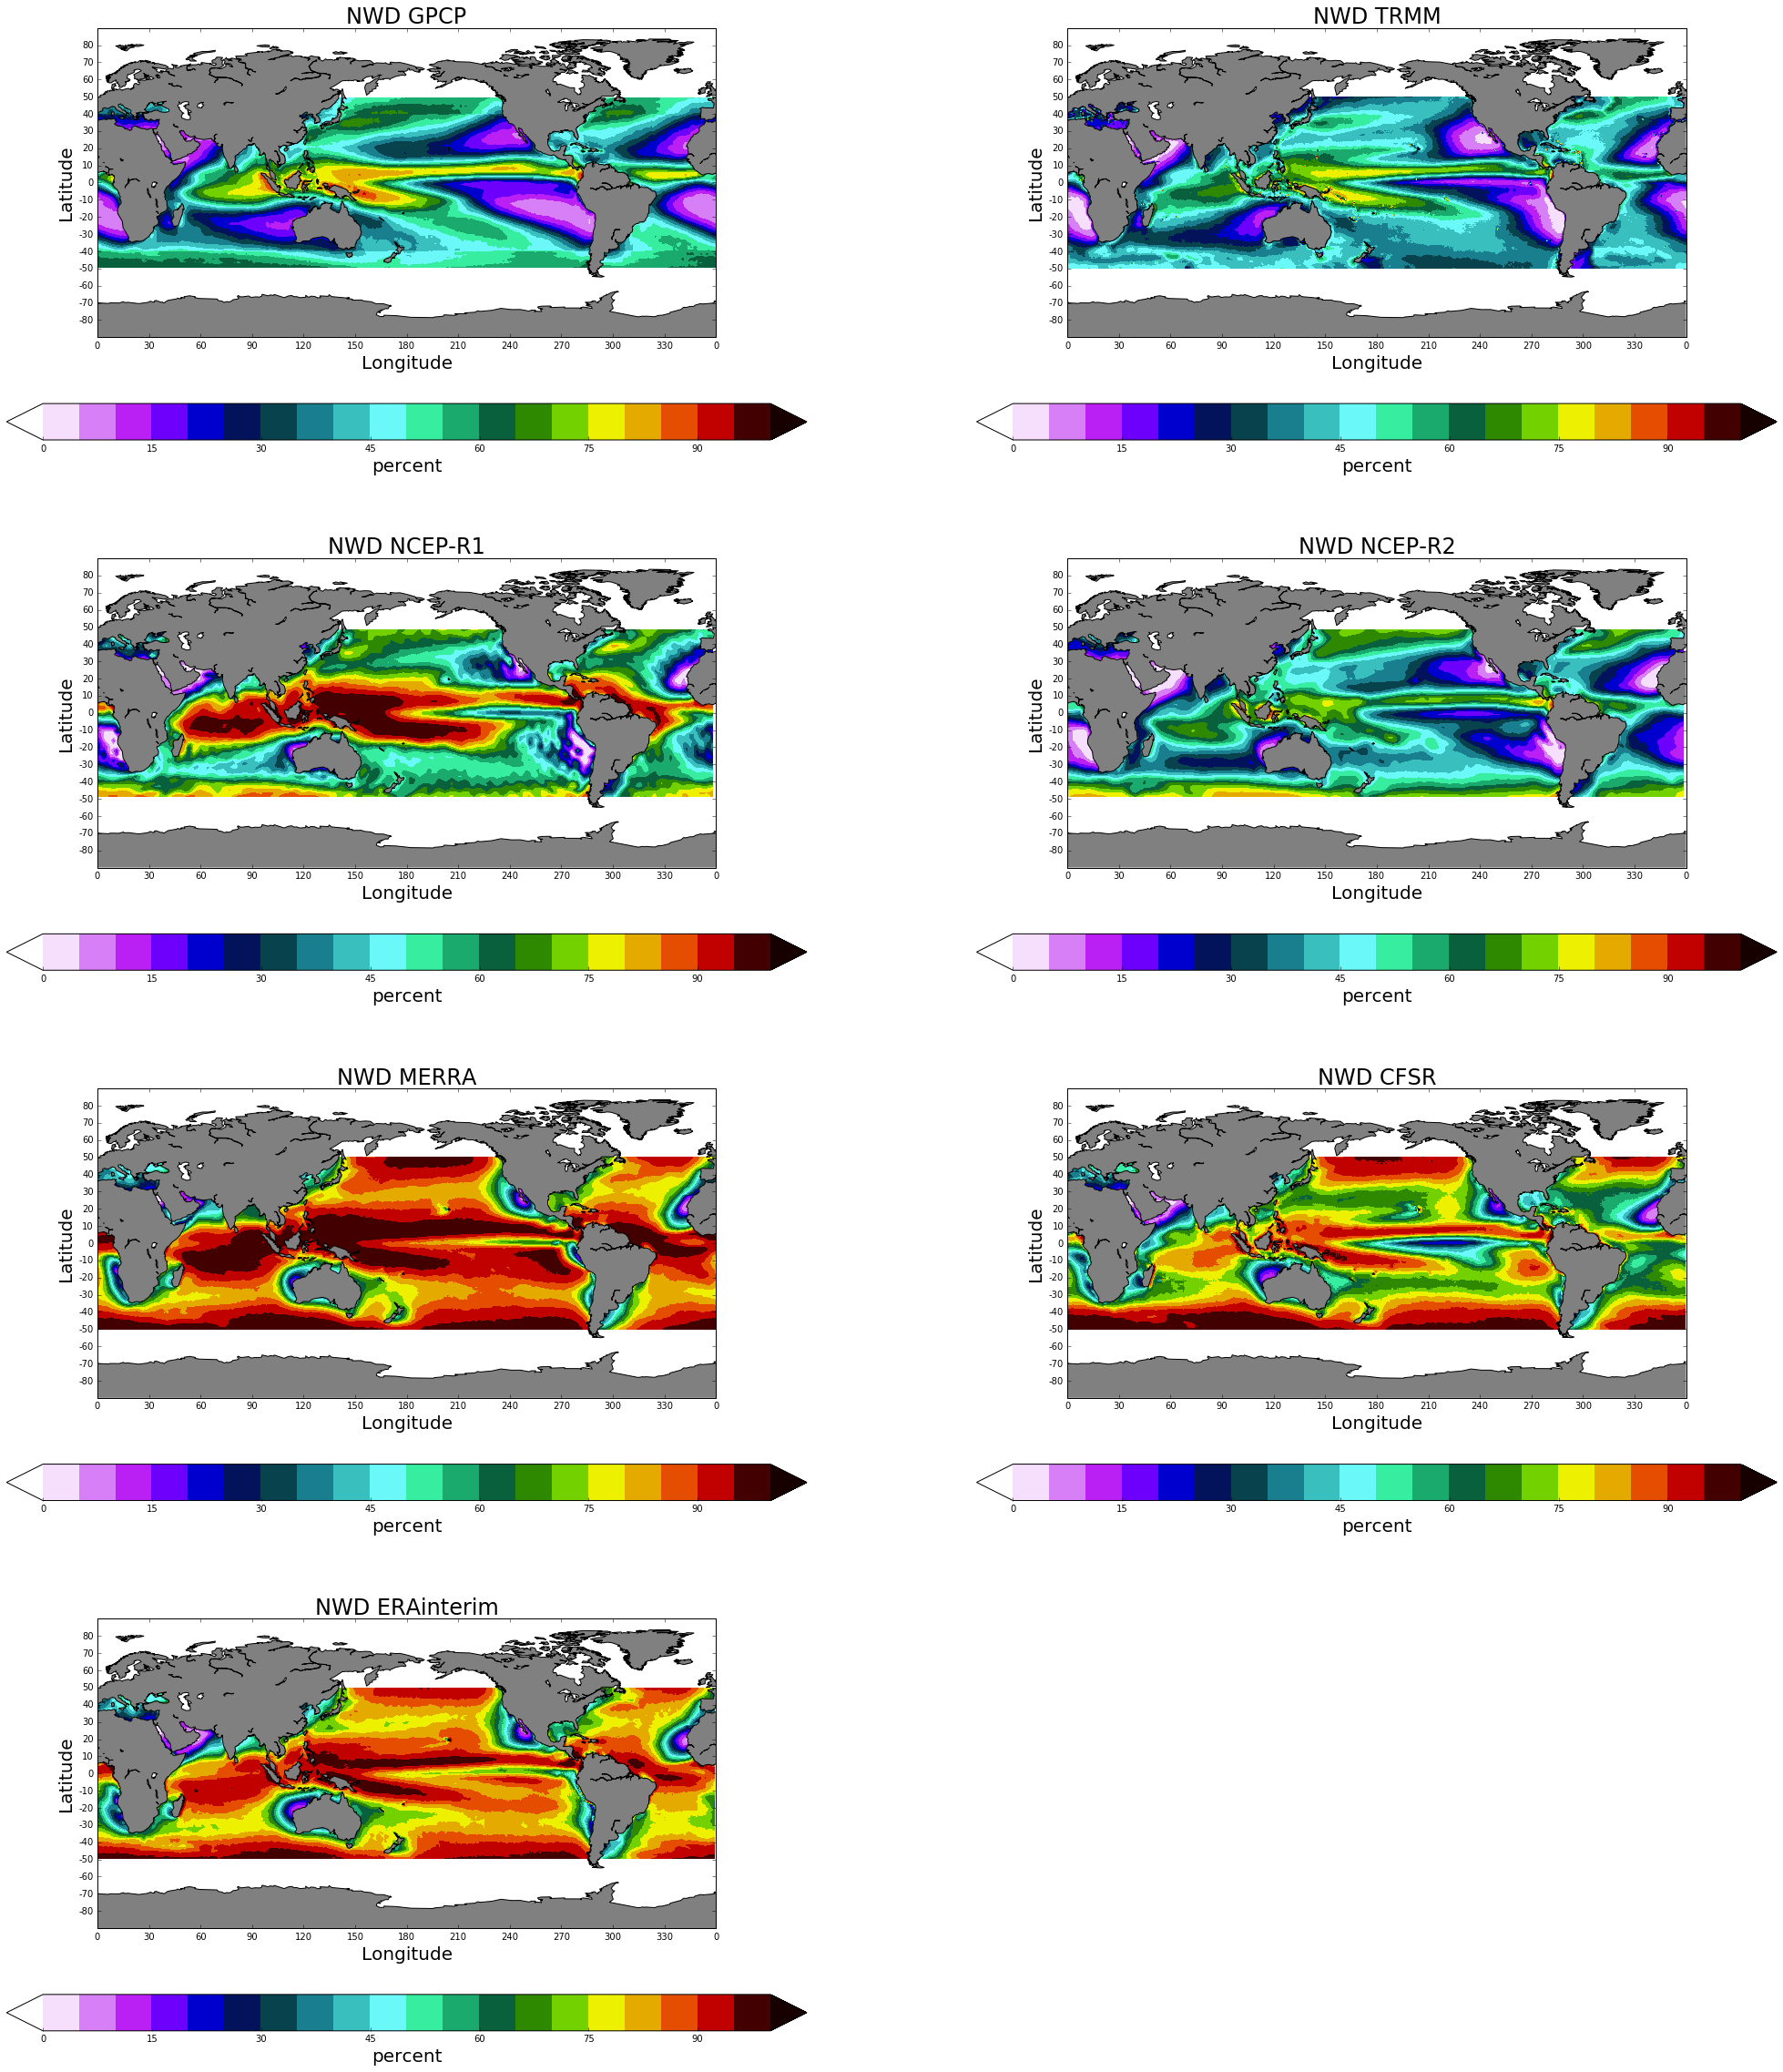

In [27]:
def map_anna2(lat,lon,nwd,title):
    m= Basemap(projection='cyl',llcrnrlat=-90,urcrnrlat=90,\
    llcrnrlon=0,urcrnrlon=360,resolution='c')
    m.contourf(lon,lat,nwd)
    m.drawcoastlines()
    limits=[0,100]
    norm = mpl.colors.Normalize(vmin=limits[0], vmax=limits[1])
    pal = raf.gen_pal_Testu()
    contours = npy.arange(0,105,5)
    #C = m.contour(lon,lat,nwd,contours,linewidths=0.5,color='black')
    C = m.contourf(lon,lat,nwd,contours,cmap=pal,norm=norm,extend='both')
    m.fillcontinents(color='grey',lake_color='white')
    # colorbar      
    cbar = plt.colorbar(C,orientation='horizontal',shrink=0.99)
    plt.clim(limits[0],limits[1])
    cbar.set_label(r'percent',fontsize=20)
    # x axis
    locs, labels = plt.xticks()
    newlocs   = npy.array([0,30,60,90,120,150,180,210,240,270,300,330,360],'f')
    newlabels = npy.array([0,30,60,90,120,150,180,210,240,270,300,330,0],'i')
    plt.xticks(newlocs,newlabels)
    plt.xlabel('Longitude',fontsize=20)
    # y axis
    locsY,labelsy = plt.yticks()
    newlocsy   = npy.array([-80,-70,-60,-50,-40,-30,-20,-10,0,10,20,30,40,50,60,70,80],'f')
    newlabelsy = npy.array([-80,-70,-60,-50,-40,-30,-20,-10,0,10,20,30,40,50,60,70,80],'i')
    plt.yticks(newlocsy,newlabelsy)
    plt.ylabel('Latitude',fontsize=20) 
    # title
    plt.title(title,fontsize=24)
    

plt.figure(figsize=[35. , 40.])
plt.subplot(4,2,1)
map_anna2(lat2D1,lon2D1,nwd1a_ma[0],'NWD GPCP')
plt.subplot(4,2,2)
map_anna2(lat2D2,lon2D2,nwd2a_ma[0],'NWD TRMM')
plt.subplot(4,2,3)
map_anna2(lat2D3,lon2D3,nwd3a_ma[0],'NWD NCEP-R1')
plt.subplot(4,2,4)
map_anna2(lat2D4,lon2D4,nwd4a_ma[0],'NWD NCEP-R2')
plt.subplot(4,2,5)
map_anna2(lat2D5,lon2D5,nwd5a_ma[0],'NWD MERRA')
plt.subplot(4,2,6)
map_anna2(lat2D6,lon2D6,nwd6a_ma[0],'NWD CFSR')
plt.subplot(4,2,7)
map_anna2(lat2D7,lon2D7,nwd7a_ma[0],'NWD ERAinterim')
plt.savefig('/home/albert/Data/precips/PLOTS/cartes_NWD_ANNAlike.png')

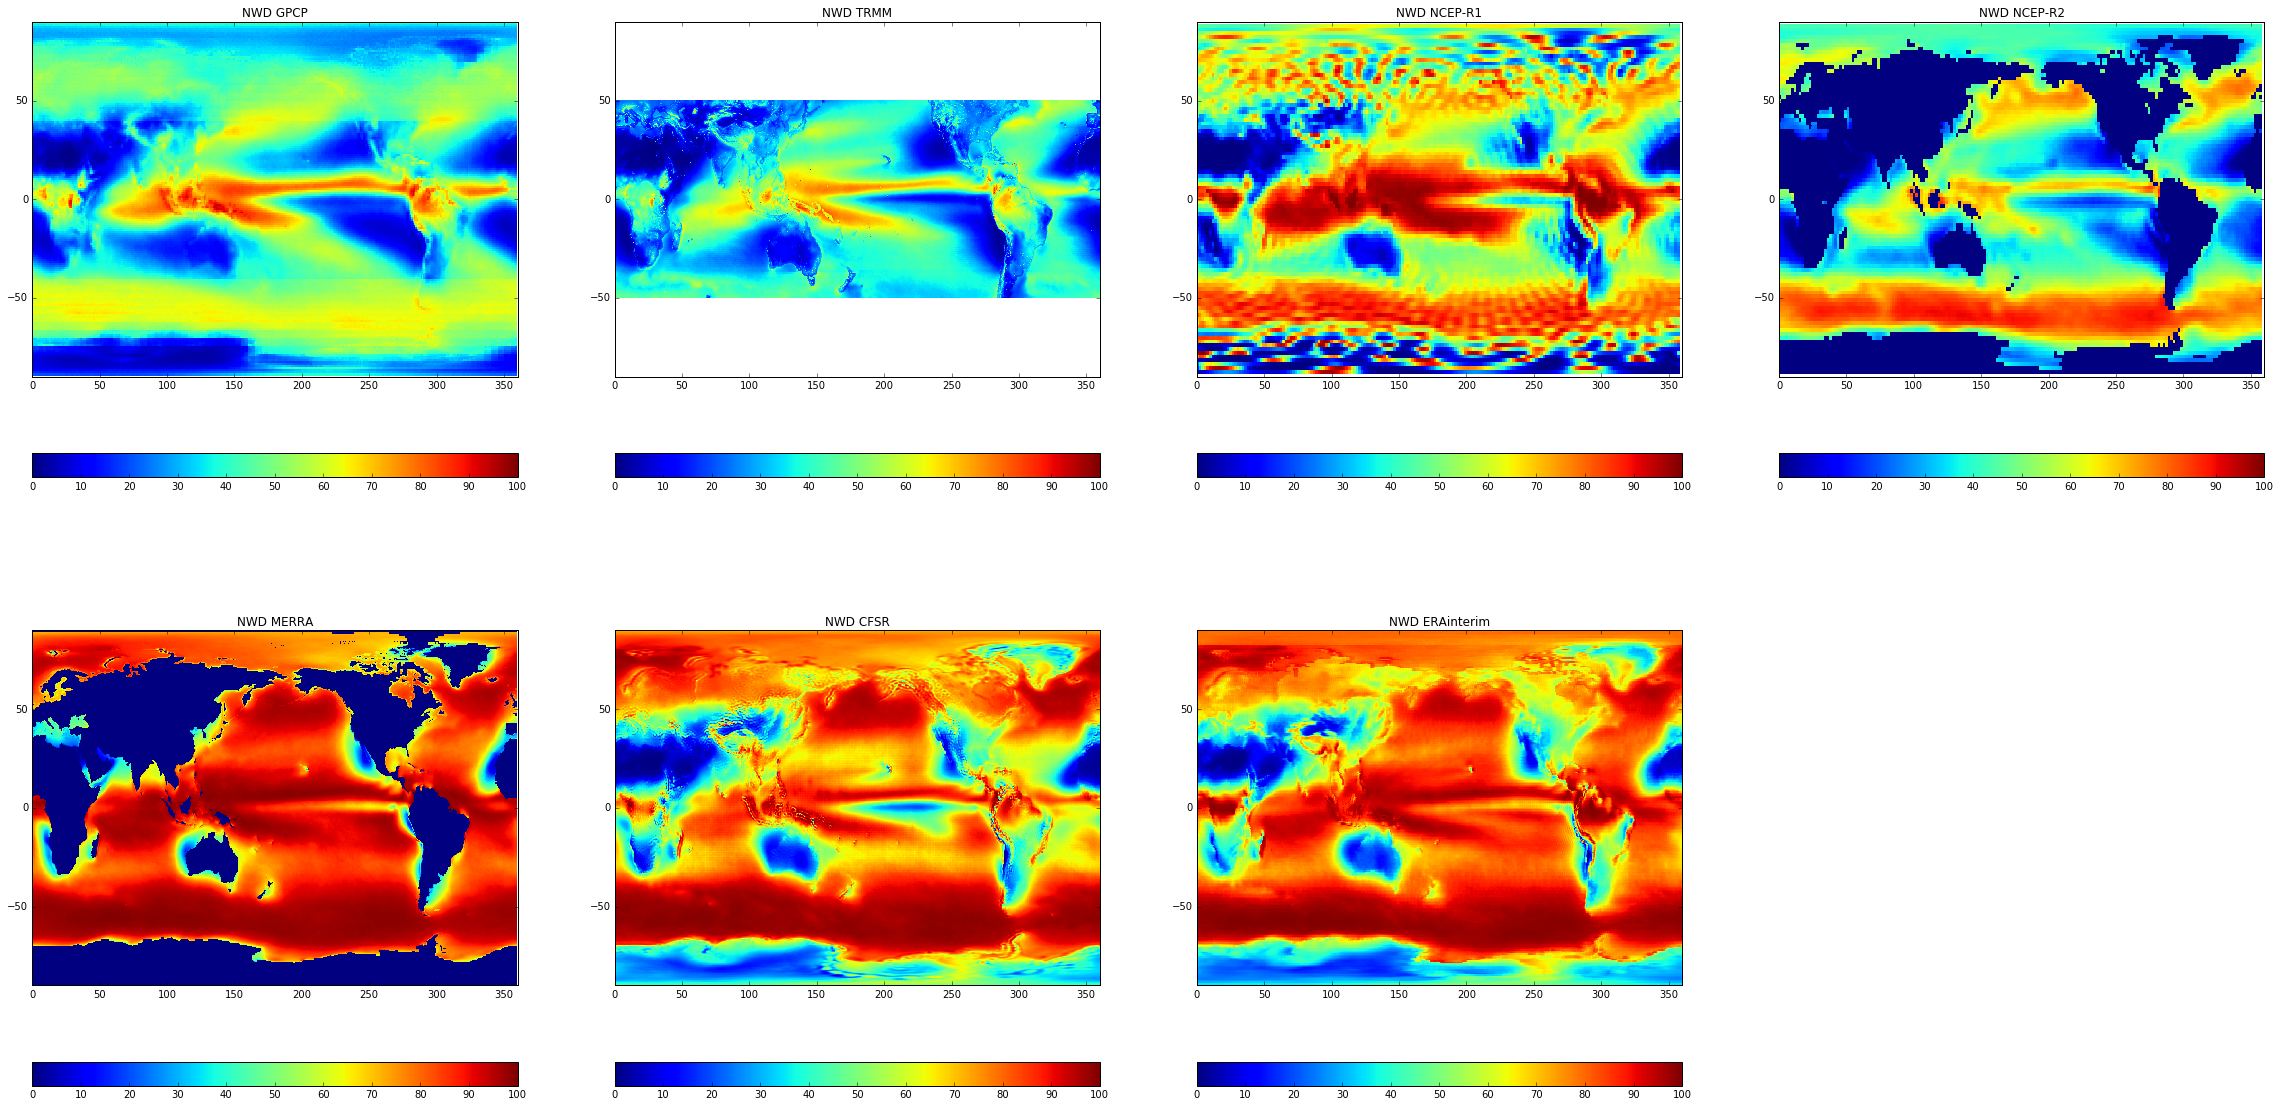

In [37]:
plt.figure(figsize=(40,20))
plt.subplot(2,4,1)
plot(lat1a,lon1a,nwd1a,'NWD GPCP')
plt.subplot(2,4,2)
plot(lat2a,lon2a,nwd2a,'NWD TRMM')
plt.subplot(2,4,3)            
plot(lat3a,lon3a,nwd3a,'NWD NCEP-R1')
plt.subplot(2,4,4)            
plotm(lat4a,lon4a,nwd4a,msk4a,'NWD NCEP-R2')
plt.subplot(2,4,5)            
plot(lat5a,lon5a,nwd5a,'NWD MERRA')
plt.subplot(2,4,6)            
plot(lat6a,lon6a,nwd6a,'NWD CFSR')
plt.subplot(2,4,7)            
plot(lat7a,lon7a,nwd7a,'NWD ERAinterim')
plt.savefig('/home/albert/Data/precips/PLOTS/cartes_NWD.png')

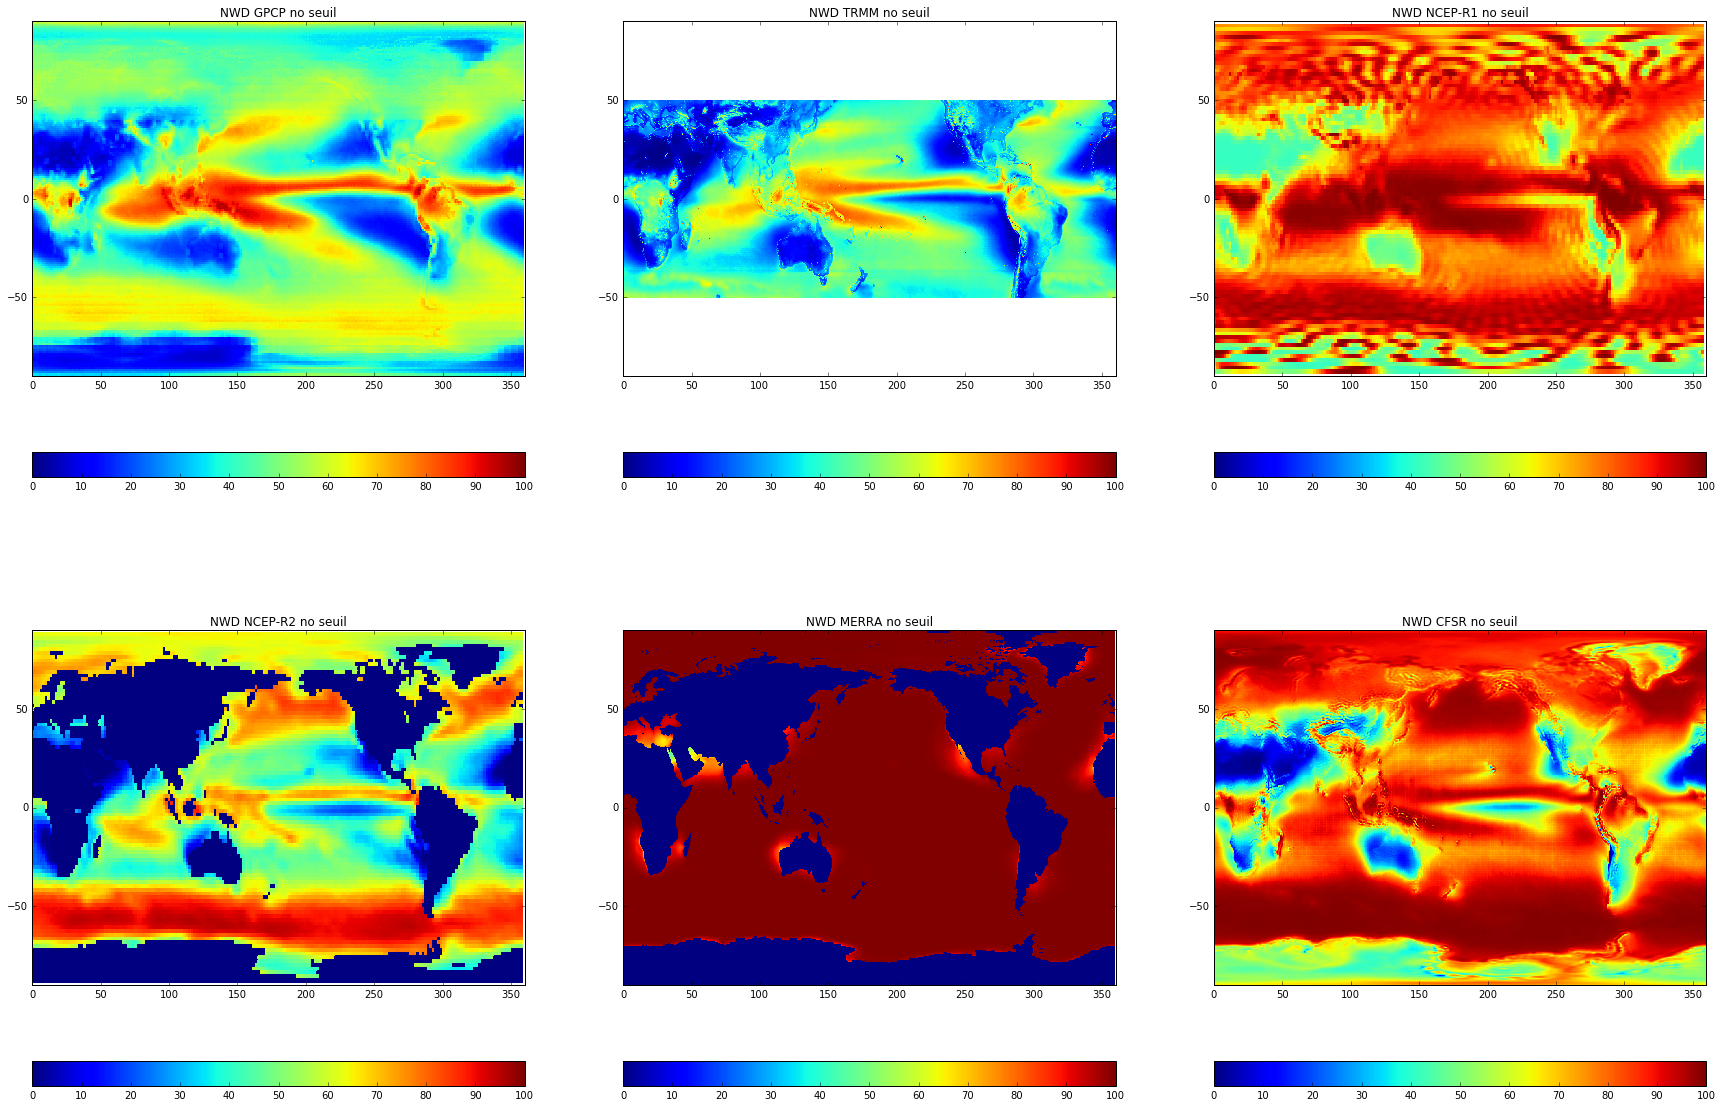

In [30]:
plt.figure(figsize=(30,20))
plt.subplot(2,3,1)
plot(lat1a,lon1a,nwdns1a,'NWD GPCP no seuil')
plt.subplot(2,3,2)
plot(lat2a,lon2a,nwdns2a,'NWD TRMM no seuil')
plt.subplot(2,3,3)            
plot(lat3a,lon3a,nwdns3a,'NWD NCEP-R1 no seuil')
plt.subplot(2,3,4)            
plotm(lat4a,lon4a,nwdns4a,msk4a,'NWD NCEP-R2 no seuil')
plt.subplot(2,3,5)            
plot(lat5a,lon5a,nwdns5a,'NWD MERRA no seuil')
plt.subplot(2,3,6)            
plot(lat6a,lon6a,nwdns6a,'NWD CFSR no seuil')
plt.savefig('/home/albert/Data/precips/PLOTS/cartes_NWD_noseuil.png')

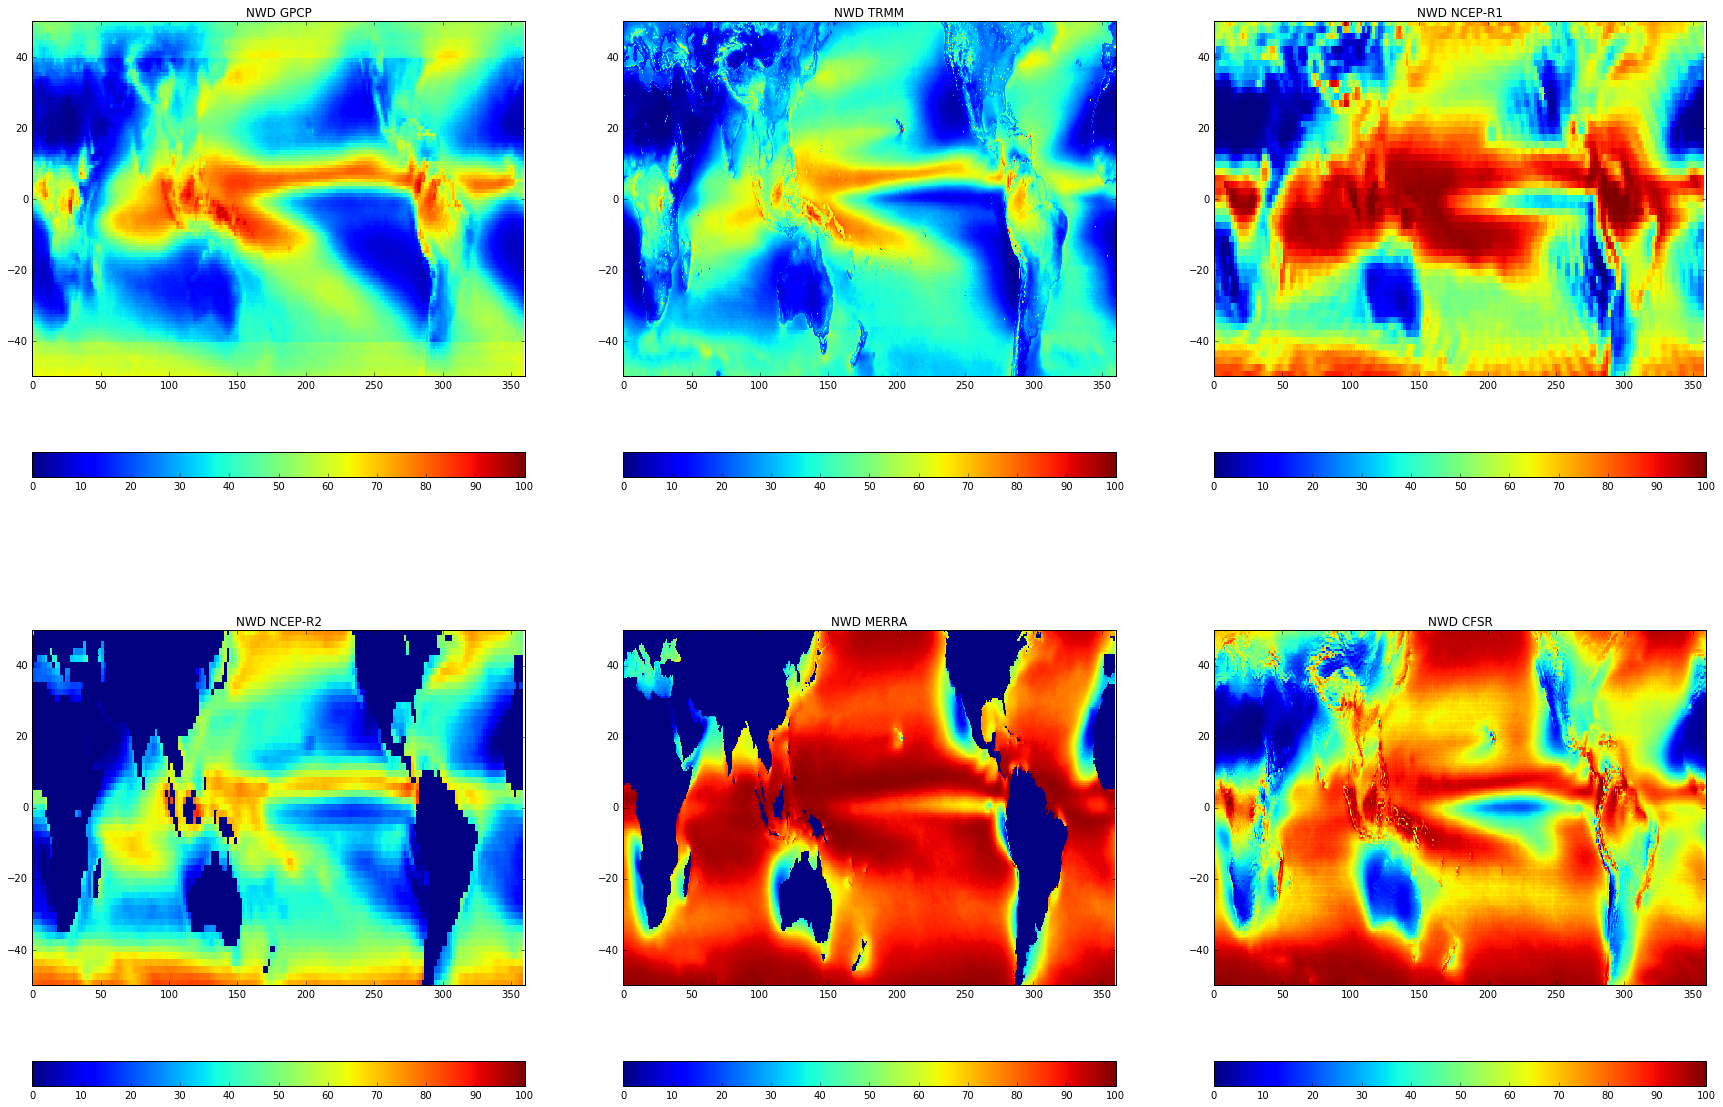

In [16]:
plt.figure(figsize=(30,20))
plt.subplot(2,3,1)
plotnh(lat1a,lon1a,nwd1a,'NWD GPCP')
plt.subplot(2,3,2)
plotnh(lat2a,lon2a,nwd2a,'NWD TRMM')
plt.subplot(2,3,3)            
plotnh(lat3a,lon3a,nwd3a,'NWD NCEP-R1')
plt.subplot(2,3,4)            
plotmnh(lat4a,lon4a,nwd4a,msk4a,'NWD NCEP-R2')
plt.subplot(2,3,5)            
plotnh(lat5a,lon5a,nwd5a,'NWD MERRA')
plt.subplot(2,3,6)            
plotnh(lat6a,lon6a,nwd6a,'NWD CFSR')
plt.savefig('/home/albert/Data/precips/PLOTS/cartes_nohighlat_NWD.png')

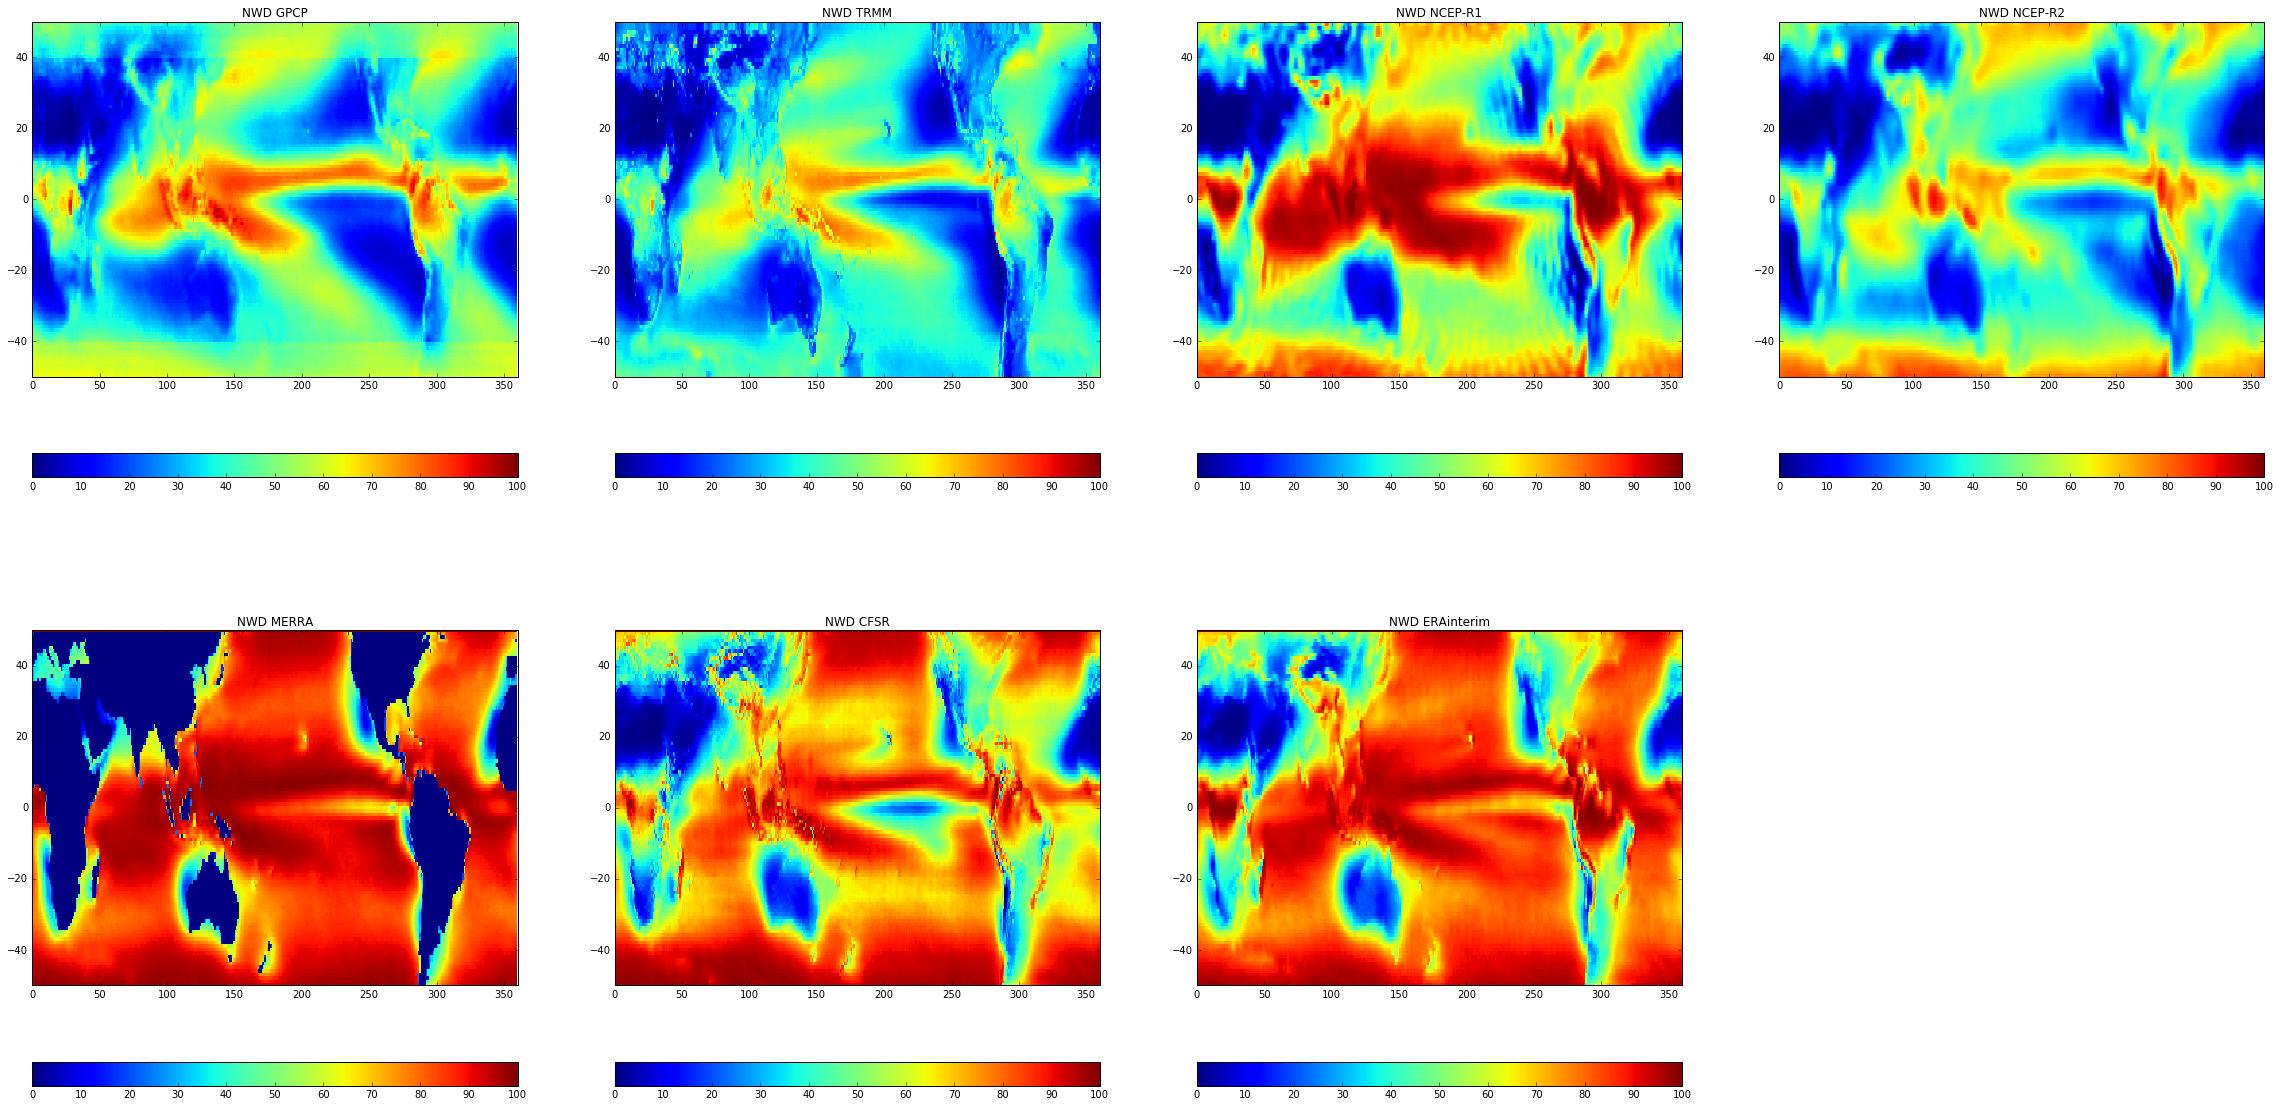

In [50]:
plt.figure(figsize=(40,20))
plt.subplot(2,4,1)
plotnh(lat1a,lon1a,nwdi1a,'NWD GPCP')
plt.subplot(2,4,2)
plotnh(lat2a,lon2a,nwdi2a,'NWD TRMM')
plt.subplot(2,4,3)            
plotnh(lat3a,lon3a,nwdi3a,'NWD NCEP-R1')
plt.subplot(2,4,4)            
plotnh(lat4a,lon4a,nwdi4a,'NWD NCEP-R2')
plt.subplot(2,4,5)            
plotnh(lat5a,lon5a,nwdi5a,'NWD MERRA')
plt.subplot(2,4,6)            
plotnh(lat6a,lon6a,nwdi6a,'NWD CFSR')
plt.subplot(2,4,7)            
plotnh(lat7a,lon7a,nwdi7a,'NWD ERAinterim')
plt.savefig('/home/albert/Data/precips/PLOTS/cartes_nohighlat_NWD_interp-on-GPCP.png')

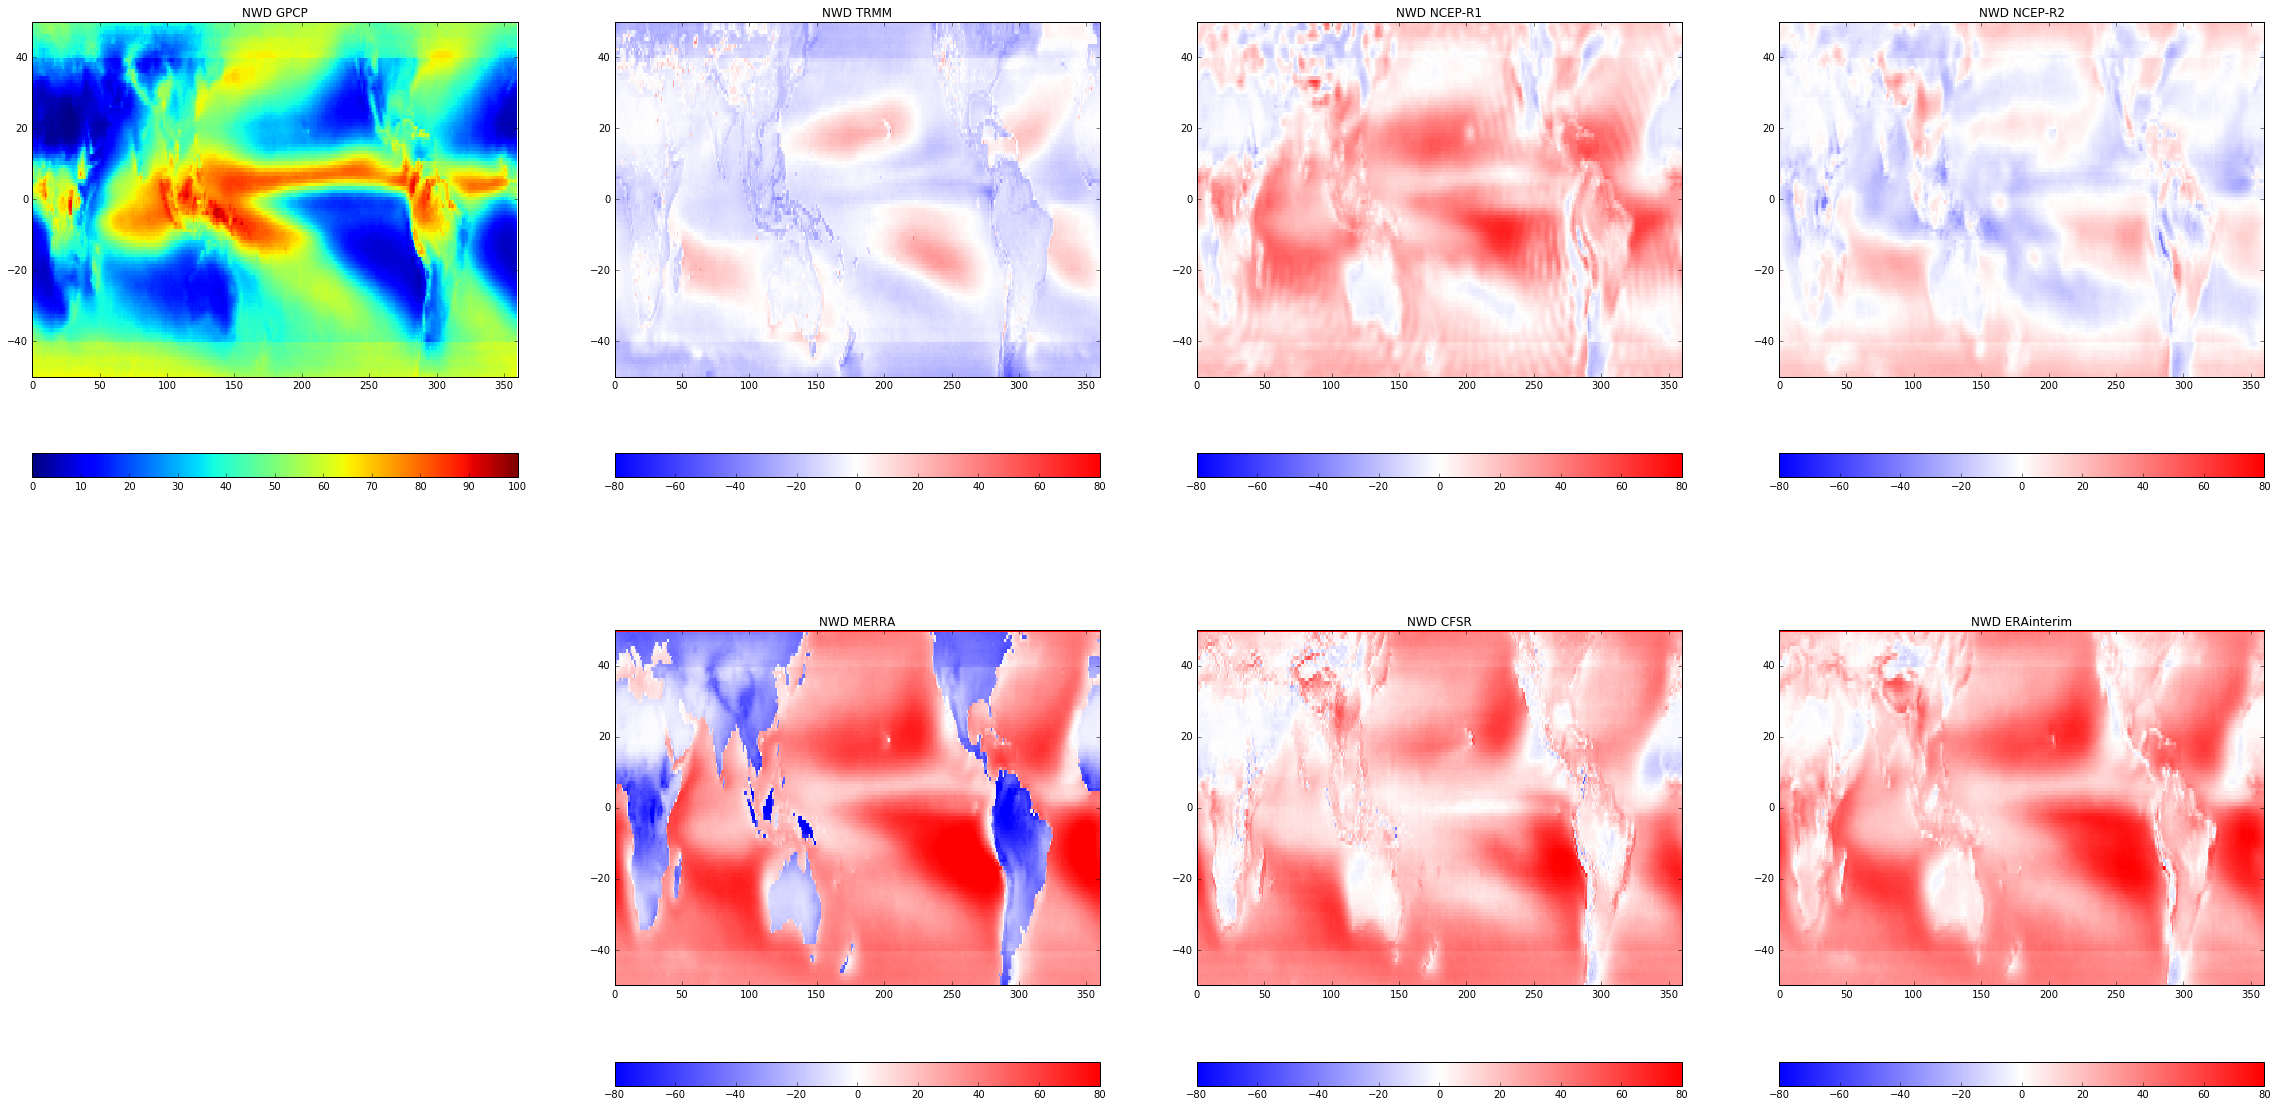

In [59]:
plt.figure(figsize=(40,20))
plt.subplot(2,4,1)
plotnh(lat1a,lon1a,nwdi1a,'NWD GPCP')
plt.subplot(2,4,2)
plotnhbwr(lat2a,lon2a,nwdi2a-nwdi1a,'NWD TRMM')
plt.subplot(2,4,3)            
plotnhbwr(lat3a,lon3a,nwdi3a-nwdi1a,'NWD NCEP-R1')
plt.subplot(2,4,4)            
plotnhbwr(lat4a,lon4a,nwdi4a-nwdi1a,'NWD NCEP-R2')
plt.subplot(2,4,6)            
plotnhbwr(lat5a,lon5a,nwdi5a-nwdi1a,'NWD MERRA')
plt.subplot(2,4,7)            
plotnhbwr(lat6a,lon6a,nwdi6a-nwdi1a,'NWD CFSR')
plt.subplot(2,4,8)            
plotnhbwr(lat7a,lon7a,nwdi7a-nwdi1a,'NWD ERAinterim')
plt.savefig('/home/albert/Data/precips/PLOTS/cartes_diff_nohighlat_NWD_interp-on-GPCP.png')

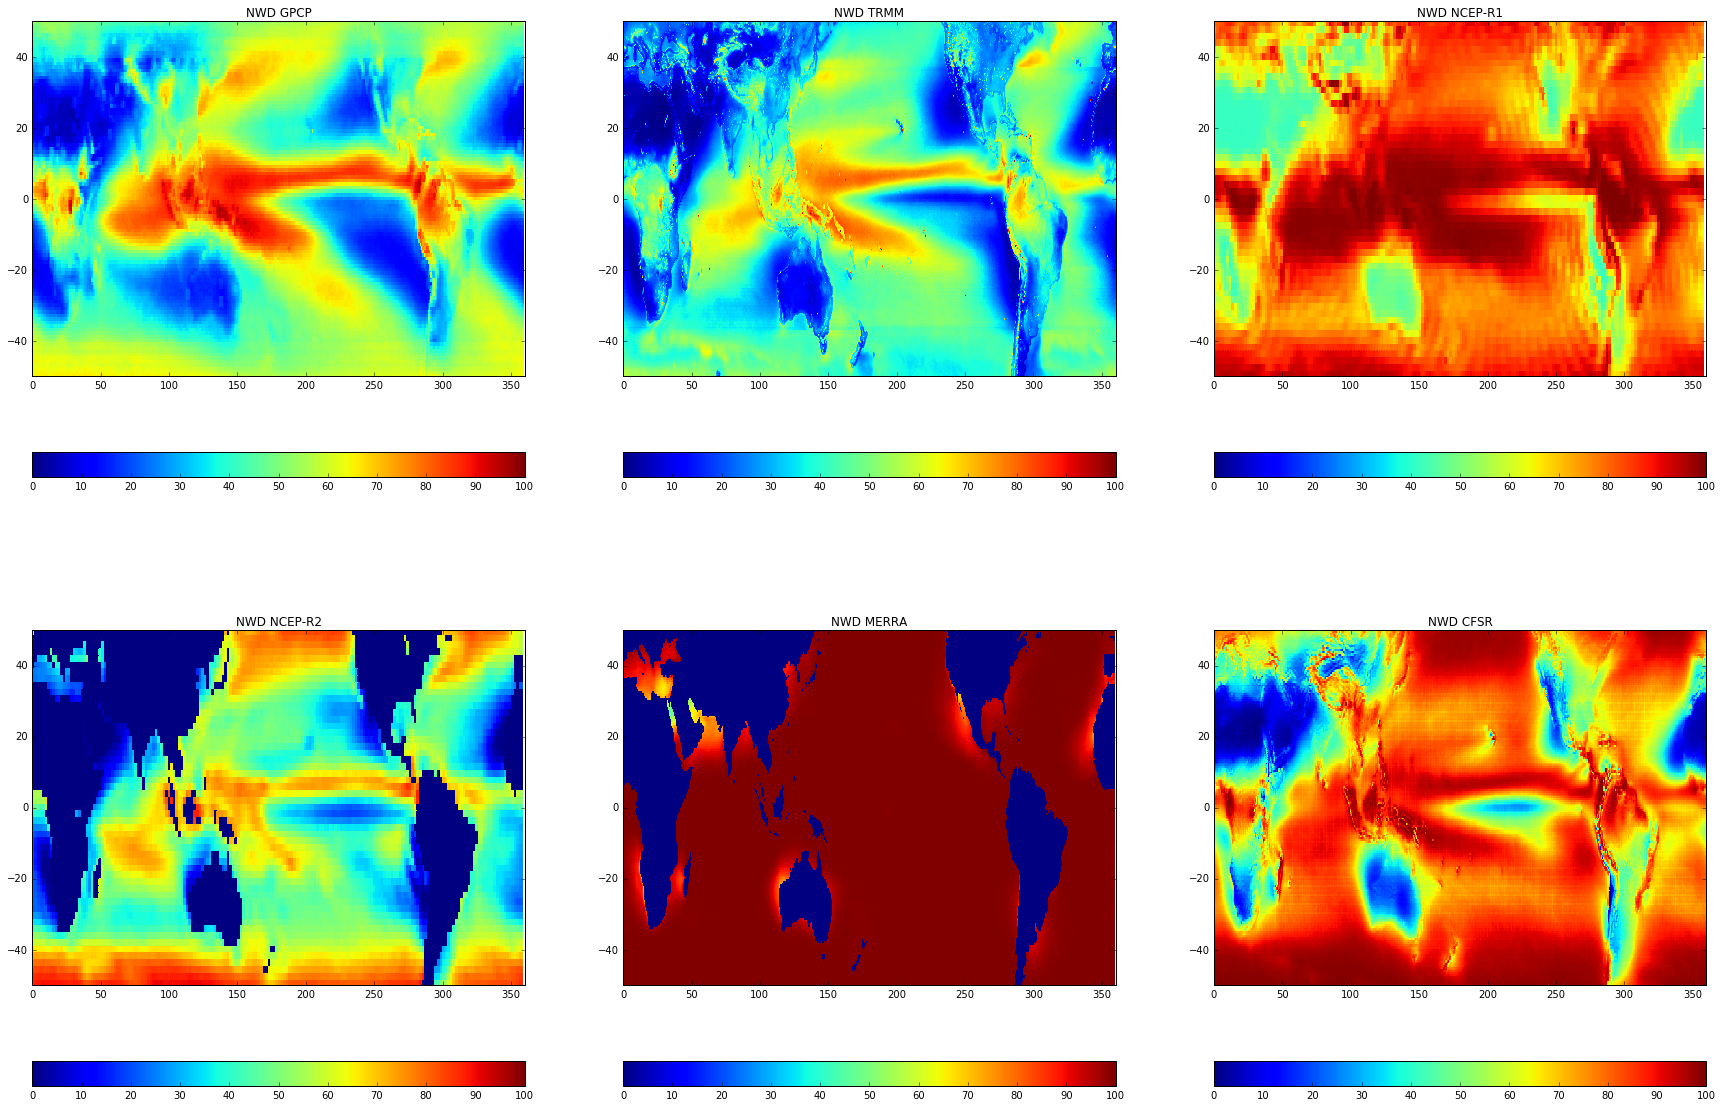

In [31]:
plt.figure(figsize=(30,20))
plt.subplot(2,3,1)
plotnh(lat1a,lon1a,nwdns1a,'NWD GPCP')
plt.subplot(2,3,2)
plotnh(lat2a,lon2a,nwdns2a,'NWD TRMM')
plt.subplot(2,3,3)            
plotnh(lat3a,lon3a,nwdns3a,'NWD NCEP-R1')
plt.subplot(2,3,4)            
plotmnh(lat4a,lon4a,nwdns4a,msk4a,'NWD NCEP-R2')
plt.subplot(2,3,5)            
plotnh(lat5a,lon5a,nwdns5a,'NWD MERRA')
plt.subplot(2,3,6)            
plotnh(lat6a,lon6a,nwdns6a,'NWD CFSR')
plt.savefig('/home/albert/Data/precips/PLOTS/cartes_nohighlat_NWD_noseuil.png')

In [17]:
from scipy import interpolate

In [ ]:
z=npy.array(nwd1a[0])
lon2D1.shape

(180, 360)

In [ ]:

nwd1on3=interpolate.griddata((lon2D1.flatten(),lat2D1.flatten()),z.flatten(), (lon2D3,lat2D3),method='cubic')



In [ ]:
interpolate.griddata?